In [2]:
#This code is designed to import and display the GLM data from GLM_DisplayTest

In [1]:
#import resources
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
import cartopy.feature as cfeature
import cartopy.mpl as cmpl

In [2]:
#import netCDF file
nc_file = nc.Dataset('/Users/KevinThiel/Grad_School/GLM_DisplayTestData/GLM_HWT/IXTR98_NSSL_s20180728195000_e20180728195100_1MIN','r')

In [3]:
#makes the variable from the netCDF file into a local variable that we can use when plotting data
flash_extent_density = nc_file.variables['Flash_extent_density'][::1]
x = nc_file.variables['x'][:]
y = nc_file.variables['y'][:]
x2= nc_file.variables['x']

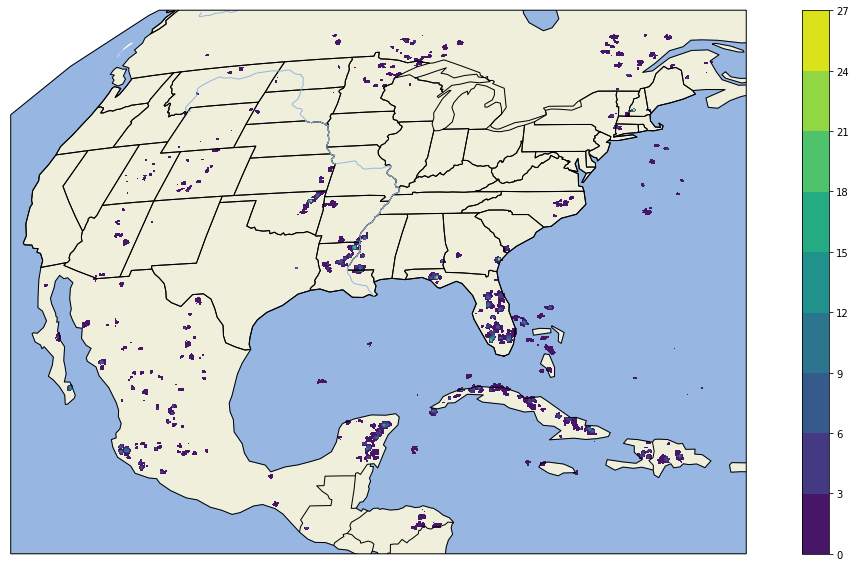

In [10]:
#creating plot with all the features
plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.Geostationary(-75,35786023.0))
ax.coastlines(resolution='110m')
plt.contourf(x*35786023.0,y*35786023.0,flash_extent_density)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)
#ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
#ax.add_feature(cmpl.Gridliner)
ax = plt.colorbar()
plt.savefig('projected.pdf')

In [1]:
#creates variable that stores the current defined working directory
workingdir = '/Users/KevinThiel/Desktop/GLM_DisplayTest/'

In [20]:
#prints working directory for variable
os.path.join(workingdir,'stuff')

'/Users/KevinThiel/Desktop/GLM_DisplayTest/stuff'

In [37]:
#another method of displaying a working directory
os.getcwd()

'/Users/KevinThiel/PycharmProjects/GLM_Import'

In [6]:
#displays all of the varaibles listed within the netCDF file
nc_file.variables.keys()

odict_keys(['x', 'y', 'Flash_extent_density', 'Flash_centroid_density', 'Average_flash_area', 'Average_group_area', 'Group_extent_density', 'Group_centroid_density', 'Event_density', 'Total_energy', 'DQF', 'goes_imager_projection'])

In [87]:
#displays the 'meta-data' for the netCDF file
nc_file 

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    cdm_data_type: Image
    Conventions: CF-1.7
    dataset_name: OR_GLM-L3-GLMC-M3_G16_s20181201833000_e20181201834000_c20181201834510.nc
    date_created: 2018-07-28T18:01:00.0Z
    id: 93cb84a3-31ef-4823-89f5-c09d88fc89e8
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    instrument_ID: GLM-1
    instrument_type: GOES R Series Geostationary Lightning Mapper
    iso_series_metadata_id: f5816f53-fd6d-11e3-a3ac-0800200c9a66
    keywords: ATMOSPHERE > ATMOSPHERIC ELECTRICITY > LIGHTNING, ATMOSPHERE > ATMOSPHERIC PHENOMENA > LIGHTNING
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 7.0.0.0.0
    license: Unclassified data.  Access is restricted to approved users only.
    Metadata_Conventions: Unidata Dataset Discovery v1.

In [9]:
#shows attributes for the individual variables
nc_file.variables['Group_extent_density']

<class 'netCDF4._netCDF4.Variable'>
float32 Group_extent_density(y, x)
    _FillValue: 0.0
    standard_name: Group Extent Density
    long_name: GLM Group Extent Density
    grid_mapping: goes_imager_projection
unlimited dimensions: 
current shape = (1499, 2499)
filling on

In [38]:

flash_extent_density.shape

(1499, 2499)

In [10]:
x2

<class 'netCDF4._netCDF4.Variable'>
int16 x(x)
    long_name: GOES fixed grid projection x-coordinate
    standard_name: projection_x_coordinate
    axis: X
    units: rad
    add_offset: -0.101304
    scale_factor: 5.6e-05
unlimited dimensions: 
current shape = (2499,)
filling on, default _FillValue of -32767 used

In [40]:

print(x[10])
print(y[10])

-0.10074400210618972
0.1276240056180954


In [8]:
#can show individual data points
#data is masked, or there is no value given, so the 'maked' is seen as the output
flash_extent_density[10,10]

masked

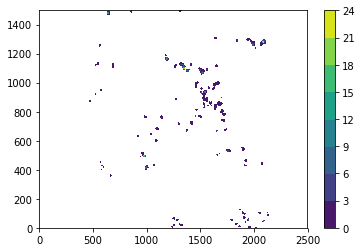

In [ ]:
#This plot shows data as it was plotted from the first inherent point (1,1) to the last point, and due to its orientation is actually upside down
#GLM Data is read in from top left corner, down to bottom right corner
#Can fix orientaiton by adjusting the brackets in the second line from 1 to -1 (reads in backwards)
fig = plt.figure()
fig = plt.contourf(flash_extent_density[::1,:])
fig = plt.colorbar()
plt.show()

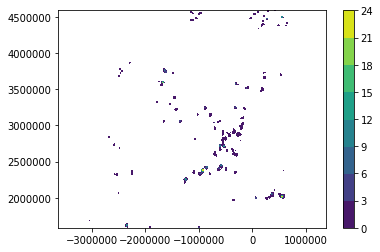

In [37]:
#This data has the correct orientation because we fitted the plt.contourf to the actual projection of the data (based on img ht.)
fig = plt.figure(figsize=(20, 10))
fig = plt.contourf(x*35786023.0,y*35786023.0,flash_extent_density)
fig = plt.colorbar()
plt.show()

In [11]:
#data is masked, or there is no value given, so the 'maked' is seen as the output
flash_extent_density[:]

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=0,
  dtype=uint8)